In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset 
from sklearn.datasets import load_digits 
from sklearn import datasets, model_selection 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm 

c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


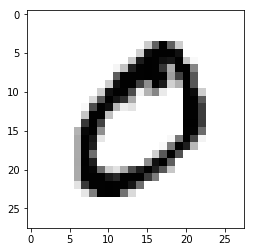

784

In [2]:
mnist = datasets.fetch_mldata('MNIST original', data_home='../data/mnist/')
mnist_data = mnist.data / 255
pd.DataFrame(mnist_data)
plt.imshow(mnist_data[0].reshape(28,28), cmap=cm.gray_r)
plt.show()
len(mnist_data[0])

In [3]:
mnist_label = mnist.target
mnist_label 

array([0., 0., 0., ..., 9., 9., 9.])

In [4]:
train_size = 5000
test_size = 500 
train_X, test_X, train_Y, test_Y = model_selection.train_test_split(mnist_data, mnist_label, train_size=train_size, test_size=test_size)

In [5]:
train_X = train_X.reshape((len(train_X), 1, 28, 28))
test_X = test_X.reshape((len(test_Y), 1, 28, 28))

In [6]:
train_X = torch.from_numpy(train_X).float()
train_Y = torch.from_numpy(train_Y).long()
test_X = torch.from_numpy(test_X).float()
test_Y = torch.from_numpy(test_Y).long()

In [7]:
train = TensorDataset(train_X, train_Y)

In [8]:
train_loader = DataLoader(train, batch_size=100, shuffle=True)

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(256,64)
        self.fc2 = nn.Linear(64,10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 256) # 16 x 16 to 256
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)

model = Net().cuda()

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
    total_loss = 0
    
    for train_x, train_y in train_loader:
        train_x, train_y = Variable(train_x.cuda()), Variable(train_y.cuda())
        optimizer.zero_grad()
        output = model(train_x)
        loss = criterion(output, train_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 100 == 0:
        print(epoch+1, total_loss)

c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


100 3.5114864856004715
200 0.6326916513498873
300 0.18338931229664013
400 0.09063274163054302
500 0.05603103639441542
600 0.040102315571857616
700 0.03036910497758072
800 0.024120075788232498
900 0.019974418144556694
1000 0.016848036990268156


In [11]:
test_x, test_y = Variable(test_X.cuda()), Variable(test_Y.cuda())
result = torch.max(model(test_x).data, 1)[1]
accuracy = sum(test_y.cpu().data.numpy() == result.cpu().numpy()) / len(test_y.cpu().data.numpy())
accuracy

c:\users\jinsoo\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


0.962